## Linear Regression                             

Linear Regression is a  linear model that assumes a linear relationship between input variables(x) and a single output variable(y).

#### Task : Simple Linear Regression

A regression task where we have to predict the percentage of marks of a student based on the number of hours he studied. A simple regression involving only two variables.

###### Performed By : Muatif Shaikh 

In [1]:
# Importing the required libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data from the raw data link
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

#### Data Visualization

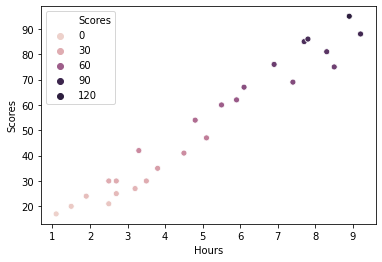

In [4]:
# Creating a scatterplot \
sns.scatterplot(x = 'Hours', y = 'Scores', hue = 'Scores', data = df)

From the above Visualization it is easily visible that a positive linear relation exists betweeen the number of hours studies and percentage of marks.

#### Model Building

In [5]:
# Creating X and Y variables for independent and dependent variables
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [6]:
X.shape

(25, 1)

In [7]:
Y.shape

(25,)

In [8]:
# Splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

Why Splitting?
Splitting is necessary for building a model.. as whole data cannot be used to generate the model, some portion of data has to be seperated out in order to perform test on the algorithm build.
This is done to get reliables estimates of the model.

In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


##### Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression

# create a model
lr = LinearRegression()

# fitting training data to the model
lr.fit(X_train, Y_train)

# predict using the model
Y_pred = lr.predict(X_test)

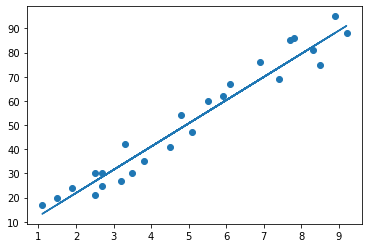

In [11]:
## PLotting the regression line
line  = lr.coef_*X + lr.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

In [12]:
df_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df_pred

,Actual,Predicted
5,20,17.097967
21,54,48.783639
22,35,39.181920
18,67,61.265873
15,95,88.150686


#### Testing the data with the given number of hours

In [13]:
hrs = [[9.25]]
pred_test = lr.predict(hrs)
print(pred_test)

[91.51128762]


#### Evaluating the model

Evaluation of the model is done to compare different algorithms on a particular same dataset. Regression models can be evaluated using various metrics functions.

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(Y_test, Y_pred)
print(r2)

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(rmse)

mae = mean_absolute_error(Y_test, Y_pred)
print(mae)

0.9605221627526419
5.15585070467339
4.9767509236804015
